# Imports

In [ ]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

# Configs

In [ ]:
data_root = '/mnt/data/mlr_ahj_datasets/vitrolife/dataset/'
metadata_file_path = os.path.join(data_root, "metadata.csv")

# Load

In [ ]:
df = pd.read_csv(metadata_file_path, index_col='SampleID')
df.head(), df.info()


# Analysis

## General

In [ ]:
df.describe()

In [ ]:
df['LabID'].value_counts()

In [ ]:
df.isnull().sum()

## Visualization

### LabID distribution

In [ ]:
df[(df.Testset == 0) & (df.LabID == 19)]

In [ ]:
labels = range(0, 23)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(9,2))

a_heights, _ = np.histogram(df[df.Testset == 0]['LabID'], bins=23)
b_heights, _ = np.histogram(df[df.Testset == 1]['LabID'], bins=23)

width = 0.4

rects1 = ax.bar(x - width/2, a_heights, width, label='Train/Validation', log=True)
rects2 = ax.bar(x + width/2, b_heights, width, label='Test', log=True)

ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', )
ax.legend(loc=(1.01,0.65))
ax.set_title("Laboratory distribution")
fig.tight_layout()

plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_lab_proportions.png", bbox_inches='tight', pad_inches=0)

### Label distribution

In [ ]:

labels = ['No', 'Yes']
x = np.arange(len(labels))
a_heights, _ = np.histogram(df[df.Testset == 0]['Label'], bins=2, )
b_heights, _ = np.histogram(df[df.Testset == 1]['Label'], bins=2)

  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Bar plot xxx')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(7,2))
df_prop = pd.DataFrame({'Train/Validation' : [len(df[df.Testset == 0])] ,
                   'Test' : [len(df[df.Testset == 1])]})
df_prop.plot.bar(stacked=True, ax=ax2, legend=None)

for ix, row in df_prop.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{round(element/22646 * 100, 2)} %",
                    va="center",
                    ha="center",
                )
                cumulative += element

plt.xticks([])
plt.yticks([])
ax2.set_title("Proportions")

#
labels = ['No', 'Yes']

a_heights, _ = np.histogram(df[df.Testset == 0]['Label'], bins=2, )
b_heights, _ = np.histogram(df[df.Testset == 1]['Label'], bins=2)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

rects1 = ax1.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax1.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('No. samples')
ax1.set_xticks(x, labels)

ax1.legend(["Train/Validation", 'Test'], loc='center', bbox_to_anchor=(1.7,0.85))
ax1.set_title("Class distribution")
plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_proportions.png", bbox_inches='tight', pad_inches=0)

In [ ]:
heartbeat = []
heartbeat_p = []
non = []
non_p = []
clients = []
for i in range(23):
    clients.append('{}{}'.format("0" if i < 9 else "" ,i+1))
    heartbeat.append((df[(df.LabID==i) & (df.Label==1)]).shape[0])
    non.append((df[(df.LabID==i) & (df.Label==0)]).shape[0])
    total_count = heartbeat[i] + non[i]
    heartbeat_p.append((heartbeat[i]/total_count)*100)
    non_p.append((non[i]/total_count)*100)

clients.append('All')
heartbeat.append((df[(df.Label==1)]).shape[0])
non.append((df[(df.Label==0)]).shape[0])
total_all_count = heartbeat[23] + non[23]
heartbeat_p.append((heartbeat[23]/total_all_count)*100)
non_p.append((non[23]/total_all_count)*100)

fig, ax = plt.subplots()
ax.invert_yaxis()

heartbeat_bars = ax.barh(
    clients,
    heartbeat_p,
    label = "Heartbeat"
)

non_bars = ax.barh(
    clients,
    non_p,
    label = "No Heartbeat",
    left=heartbeat_p
)

ax.bar_label(non_bars, label_type='edge', labels=['%d' % x for x in heartbeat], padding=-340, fontsize=8)
ax.bar_label(non_bars, label_type='edge', labels=['%d' % x for x in non], padding=-32, fontsize=8)
    
ax.set_xlabel('Sample Distribution (%)')
ax.set_ylabel('Laboratory')
ax.set_title('Embryos Class Distribution')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_class_distribution.png", bbox_inches='tight', pad_inches=0)

In [ ]:
# Getting meta data
samples = []
labId = range(23)
for id in labId:
    samples.append((df[(df.LabID==id) & (df.Testset==0)]).shape[0])

#Size sorting labs
labId = [x for _,x in sorted(zip(samples,labId), reverse=True)]

total_samples = np.sum(samples)
included_clients_settings = [5, 10, 15]
included_clients = []
included_samples = []
not_included_samples = []
for setting in included_clients_settings:
    included_clients.append('{}'.format(setting))
    included_samples.append(np.sum(itemgetter(*labId[:setting])(samples)))
    not_included_samples.append(total_samples-np.sum(itemgetter(*labId[:setting])(samples)))

fig, ax = plt.subplots()
ax.invert_yaxis()

heartbeat_bars = ax.barh(
    included_clients,
    included_samples,
    label = "Included"
)

non_bars = ax.barh(
    included_clients,
    not_included_samples,
    label = "Not Included",
    left=included_samples,
    color='Gray'
)

ax.bar_label(non_bars, label_type='edge', labels=["%d%%" % ((x/total_samples)*100) for x in included_samples], padding=-320)
    
ax.set_xlabel('Training samples')
ax.set_ylabel('Amount of Laboratories')
ax.set_title('Embryos Trainingset Utilization')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_training_set_utilization.png", bbox_inches='tight', pad_inches=0)

In [ ]:
# Getting meta data
samples = []
labId = range(23)
for id in labId:
    samples.append((df[(df.LabID==id) & (df.Testset==0)]).shape[0])

#Size sorting labs
labId = [x for _,x in sorted(zip(samples,labId), reverse=True)]

total_samples = np.sum(samples)
included_clients_settings = [5, 10, 15]
included_clients = []
included_samples = []
not_included_samples = []
for setting in included_clients_settings:
    included_clients.append('{}'.format(setting))
    included_samples.append(np.sum(itemgetter(*labId[:setting])(samples)))
    not_included_samples.append(total_samples-np.sum(itemgetter(*labId[:setting])(samples)))

fig, ax = plt.subplots()
ax.invert_yaxis()

heartbeat_bars = ax.barh(
    included_clients,
    included_samples,
    label = "Included"
)

non_bars = ax.barh(
    included_clients,
    not_included_samples,
    label = "Not Included",
    left=included_samples,
    color='Gray'
)

ax.bar_label(non_bars, label_type='edge', labels=["%d%%" % ((x/total_samples)*100) for x in included_samples], padding=-320)
    
ax.set_xlabel('Training samples')
ax.set_ylabel('Amount of Laboratories')
ax.set_title('Embryos Trainingset Utilization')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_training_set_utilization.png", bbox_inches='tight', pad_inches=0)

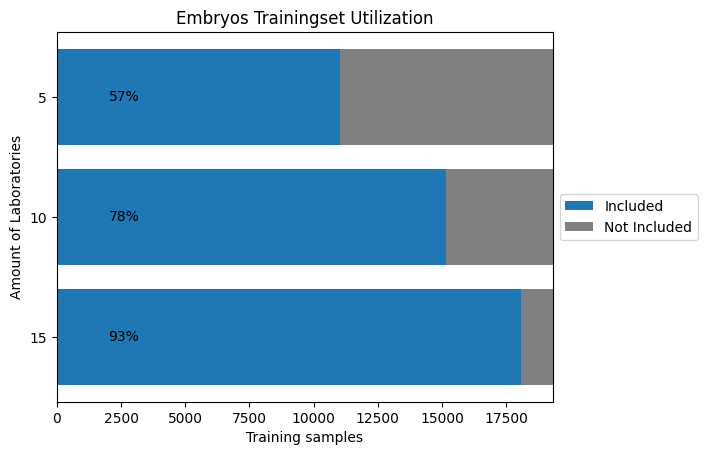

In [50]:
# Getting meta data
samples = []
labId = range(23)
for id in labId:
    samples.append((df[(df.LabID==id) & (df.Testset==0)]).shape[0])

#Size sorting labs
labId = [x for _,x in sorted(zip(samples,labId), reverse=True)]

total_samples = np.sum(samples)
included_clients_settings = [5, 10, 15]
included_clients = []
included_samples = []
not_included_samples = []
for setting in included_clients_settings:
    included_clients.append('{}'.format(setting))
    included_samples.append(np.sum(itemgetter(*labId[:setting])(samples)))
    not_included_samples.append(total_samples-np.sum(itemgetter(*labId[:setting])(samples)))

fig, ax = plt.subplots()
ax.invert_yaxis()

heartbeat_bars = ax.barh(
    included_clients,
    included_samples,
    label = "Included"
)

non_bars = ax.barh(
    included_clients,
    not_included_samples,
    label = "Not Included",
    left=included_samples,
    color='Gray'
)

ax.bar_label(non_bars, label_type='edge', labels=["%d%%" % ((x/total_samples)*100) for x in included_samples], padding=-320)
    
ax.set_xlabel('Training samples')
ax.set_ylabel('Amount of Laboratories')
ax.set_title('Embryos Trainingset Utilization')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("/home/maddox/data/embryos/images/embryos_training_set_utilization.png", bbox_inches='tight', pad_inches=0)